#Mounting the Drive to the colab for accessing the files and other revalent data.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from random import randint
from statistics import stdev
from statistics import variance
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
%matplotlib inline

#Reading the Given CSV files using Pandas

In [ ]:
Bookuser= pd.read_csv("/content/drive/MyDrive/Data_mining/BX-Users.csv",error_bad_lines=False, delimiter=';', encoding = 'ISO-8859-1')
Bookrating= pd.read_csv('/content/drive/MyDrive/Data_mining/BX-Book-Ratings.csv',error_bad_lines=False, delimiter=';', encoding = 'ISO-8859-1')
Bookdata= pd.read_csv('/content/drive/MyDrive/Data_mining/BX-Books.csv',error_bad_lines=False, delimiter=';', encoding = 'ISO-8859-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


#Merging Dataframes to single Dataframe using pandas merge
The different dataframes are merged using inner merge on ISBN and UserID

In [ ]:
data = pd.merge(Bookrating, Bookuser, on='User-ID', how='inner').merge(Bookdata,on= "ISBN",how='inner')

In [ ]:
print("The shape of the merged dataframe is:",data.shape)
print("The size of the merged dataframe is:", data.size)
print("The columns of the merged dataframes are:\n",data.columns)
data.info()

The shape of the merged dataframe is: (1031136, 12)
The size of the merged dataframe is: 12373632
The columns of the merged dataframes are:
 Index(['User-ID', 'ISBN', 'Book-Rating', 'Location', 'Age', 'Book-Title',
       'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  int64  
 1   ISBN                 1031136 non-null  object 
 2   Book-Rating          1031136 non-null  int64  
 3   Location             1031136 non-null  object 
 4   Age                  753301 non-null   float64
 5   Book-Title           1031136 non-null  object 
 6   Book-Author          1031135 non-null  object 
 7   Year-Of-Publication  1031136 non-null  object 
 8   Publisher     

#Data Selection

considering the merged dataset, one can  see that image URLs columns do not seem to be required for analysis, and hence these can be dropped off from the dataframes.

Merged dataframe contains Book-Rating and User-ID as arrtibutes, renaming these attributes with BookRating and UserID, BookAuthor, YearOfPublication.

In [ ]:
to_drop = ['Image-URL-S', 'Image-URL-M', 'Image-URL-L']
data = data.drop(to_drop, axis=1, inplace=False)

data.rename(columns={'Book-Rating':'BookRating', 'User-ID':'UserID','Book-Author':'BookAuthor','Year-Of-Publication':'YearOfPublication'},inplace=True)
pd.set_option('display.max_colwidth',None)

Display the head of the merged dataframe:


In [ ]:
data.head()

,UserID,ISBN,BookRating,Location,Age,Book-Title,BookAuthor,YearOfPublication,Publisher
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


#Data Cleaning

We now check the data types for each of the columns, and correct the missing & discrepant entries. I am also adjusting the column width to display full text of columns.


## 1.Year of Publication:

In [ ]:
data.YearOfPublication.unique()

array([2002, '2001', 1996, '1999', 1998, 2001, 1994, 1995, 2003, 1997,
       '1995', 1999, '1998', '2024', 1992, '1983', '2002', '1996', '2000',
       0, '1989', '2003', '1991', 1993, '1994', 1976, '1993', 1991, '0',
       2000, 1983, 1990, 1982, 1988, 1981, '1988', 1989, 1986, '1987',
       '1992', 1987, '1980', '1990', '1997', 2004, 1984, '1982', '1985',
       1985, 1979, '2004', '1984', 1974, '1979', 1977, 1965, 1972, '1978',
       '1986', '1981', 1962, '1977', 1957, 1958, 1960, 1963, 1969, '1974',
       1978, 1970, '1972', 1980, '1975', 1959, '1960', 1968, '1976',
       '1970', '1971', 1975, 1973, '1950', '1969', '1962', 1971, 1964,
       1955, 1953, 1966, '1965', '1963', '1973', 1930, '1964', 1961,
       '1952', 1940, '1968', 1954, '1967', '1911', 1952, 1946, 1941, 1920,
       1967, 1956, 1942, 1951, 1948, '1959', 1950, 2005, 1943, 1937, 1923,
       1945, 1947, 1936, 1925, '1966', '1958', 1927, 2030, 2011, 2020,
       1939, 1926, 1938, '1961', 1911, 1904, 1949, 1932, 

From the above cell output one can find incorrect entries for yearofPublication.'DK Publishing Inc' and 'Gallimard' are incorrect entries which are found in Yearofpublication. Also some Numeric values are in string format. Necessary correction for these rows will be done and data-type for yearOfPublication will be given as int.

In [ ]:
data.loc[data.YearOfPublication == 'DK Publishing Inc',:]

,UserID,ISBN,BookRating,Location,Age,Book-Title,BookAuthor,YearOfPublication,Publisher
911154,130571,0789466953,0,"summerville, south carolina, usa",NaN,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg
949657,169663,078946697X,0,"towson, maryland, usa",NaN,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
949658,227771,078946697X,7,"savion, n/a, israel",19.0,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg


In [ ]:
data.loc[data.ISBN =='0789466953' ,'YearOfPublication']=2000
data.loc[data.ISBN =='0789466953' ,'BookAuthor']="James Buckley"
data.loc[data.ISBN =='0789466953' ,'Publisher']="DK Publishing Inc"
data.loc[data.ISBN =='0789466953' ,'Book-Title']="DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

data.loc[data.ISBN =='078946697X' ,'YearOfPublication']=2000
data.loc[data.ISBN =='078946697X' ,'BookAuthor']="Michael Teitelbaum"
data.loc[data.ISBN =='078946697X' ,'Publisher']="DK Publishing Inc"
data.loc[data.ISBN =='078946697X' ,'Book-Title']="DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [ ]:
data.loc[data.YearOfPublication == 'Gallimard',:]

,UserID,ISBN,BookRating,Location,Age,Book-Title,BookAuthor,YearOfPublication,Publisher
918145,137190,2070426769,0,"rennes, bretagne, france",31.0,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [ ]:
data.loc[data.ISBN =='2070426769' ,'YearOfPublication']=2003
data.loc[data.ISBN =='2070426769' ,'BookAuthor']="Jean-Marie Gustave Le ClÃ?Â©zio"
data.loc[data.ISBN =='2070426769' ,'Publisher']="Gallimard"
data.loc[data.ISBN =='2070426769' ,'Book-Title']="Peuple du ciel, suivi de 'Les Bergers"

In [ ]:
data.YearOfPublication= pd.to_numeric(data.YearOfPublication,errors= 'coerce')

In [ ]:
print (sorted(data['YearOfPublication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [ ]:
#plotting:
def plothist(df,cname,titlename):
  df.hist(column=cname,bins=20,histtype ='bar',facecolor='b')
  plt.xlabel(cname)
  plt.ylabel('Total count')
  plt.title(titlename)
  plt.grid(False)


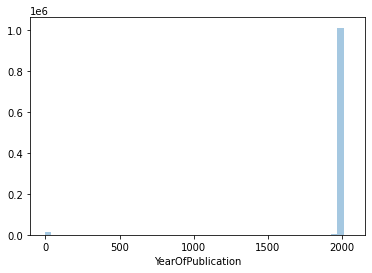

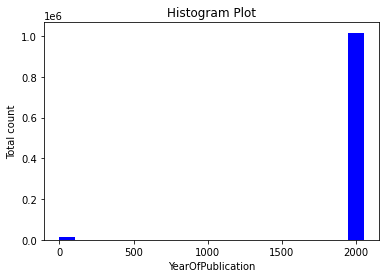

In [ ]:
sns.distplot(data['YearOfPublication'].dropna(), kde=False);
plothist(data,'YearOfPublication','Histogram Plot')

It can now be seen that yearOfPublication is of type int and it has values ranging from 0–2050. Since considering the datasete to be fresh hence all year after 2015 are invalid. For all the invalid entries (including 0) will converted to NaNs, and then replace them with random integer values of remaining years.

In [ ]:
data.loc[(data.YearOfPublication >2015)| (data.YearOfPublication ==0) |(data.YearOfPublication <1800),'YearOfPublication']=np.NAN
data.YearOfPublication.fillna(randint(1800,2010),inplace=True)
data.YearOfPublication=data.YearOfPublication.astype(np.int32)

## 2.Publisher

In [ ]:
data.loc[data.Publisher.isnull(),:]

,UserID,ISBN,BookRating,Location,Age,Book-Title,BookAuthor,YearOfPublication,Publisher
862973,98391,193169656X,9,"morrow, georgia, usa",52.0,Tyrant Moon,Elaine Corvidae,2002,NaN
862984,98391,1931696993,9,"morrow, georgia, usa",52.0,Finders Keepers,Linnea Sinclair,2001,NaN


In [ ]:
data.Publisher.fillna('Not Given',inplace=True)

## 3.UserID


In [ ]:
data.UserID.unique()

array([276725,   2313,   6543, ..., 276618, 276647, 276660])

## 4.Age

Attribute named *Age* has NaN values and some very high values. Ages below 7 and above 85 do not make much sense, and hence, these are being replaced with NaNs. All the NaNs are then replaced with mean value of Age, and its data type is set as int.


In [ ]:
print(sorted(data.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 89.0, 90.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 103.0, 104.0, 105.0, 107.0, 108.0, 109.0, 114.0, 116.0, 118.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 138.0, 140.0, 141.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 168.0, 199.0, 200.0, 201.0, 204.0, 209.0, 212.0, 219.0, 220.0, 223.0, 226.0, 228.0, 229.0, 237.0, 239.0, 244.0]


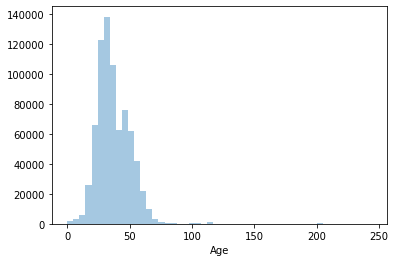

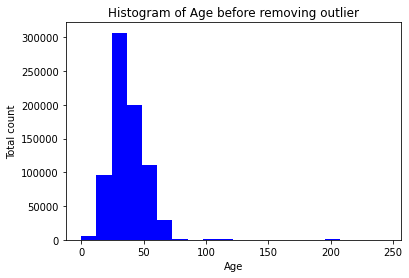

In [ ]:
#plotting the age histogram
sns.distplot(data['Age'].dropna(), kde=False);
plothist(data,'Age','Histogram of Age before removing outlier')

In [ ]:
data= data[data['Age']<100]
data.loc[(data.Age >85)| (data.Age <7),'Age']=np.NAN
data.Age.fillna(round(data.Age.mean()),inplace=True)
data.Age=data.Age.astype(np.int32)

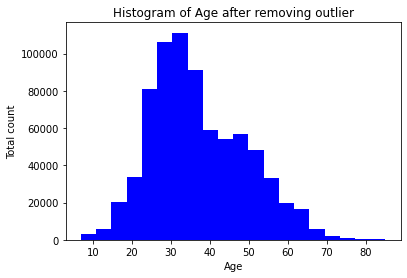

In [ ]:
#plotting histogram
plothist(data,'Age','Histogram of Age after removing outlier')

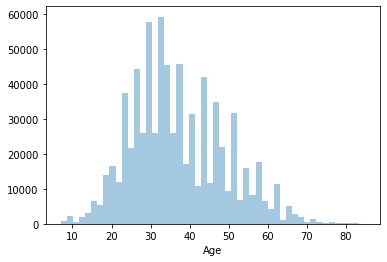

In [ ]:
sns.distplot(data['Age'].dropna(), kde=False);

## 5.Book Rating:

Book rating ranges between 1-10 but the dataframes has some rating are 0 and does not make sense hence dropping the rows with zero rating and converting all other rating to integer value.

In [ ]:
data.BookRating.unique()

array([ 5,  0,  8,  9,  6,  7,  4,  3, 10,  1,  2])

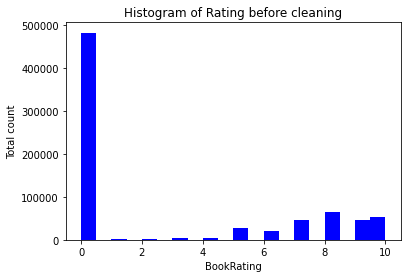

In [ ]:
plothist(data,'BookRating','Histogram of Rating before cleaning')

In [ ]:
data= data[data['BookRating']>0]
data.BookRating=data.BookRating.astype(np.int32)

In [ ]:
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

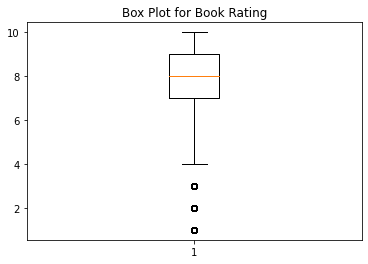

In [ ]:
#box- plot:
import seaborn as sns
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot for Book Rating')
ax1.boxplot(data['BookRating']);

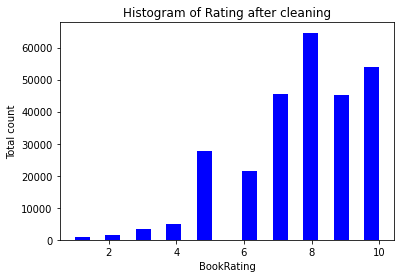

In [ ]:
plothist(data,'BookRating','Histogram of Rating after cleaning')

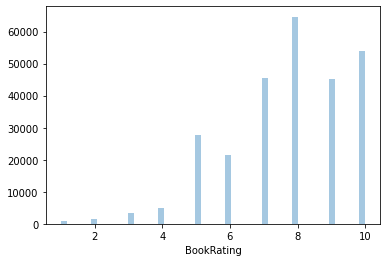

In [ ]:
sns.distplot(data['BookRating'].dropna(), kde=False);

#Normalization  and Transformation:




## MIN-MAX Normalization
Here the rating will be normalized to 1-5

In [ ]:
import copy
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pylab
from scipy import stats

In [ ]:
datacopyf1= copy.deepcopy(data)
datacopyf2= copy.deepcopy(data)
datacopyf3= copy.deepcopy(data)
datacopyf4 = copy.deepcopy(data)


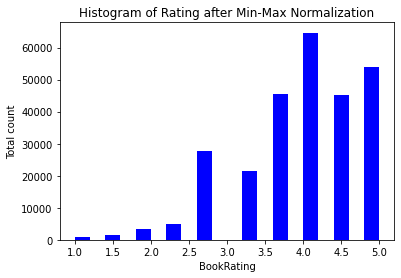

In [ ]:
#Min-Max Normalization:
scaler = MinMaxScaler(feature_range=(1, 5), copy=False)
scaler.fit(datacopyf1['BookRating'].values.reshape(-1,1))
datacopyf1['BookRating'] = scaler.transform(datacopyf1['BookRating'].values.reshape(-1,1))
plothist(datacopyf1,'BookRating','Histogram of Rating after Min-Max Normalization')

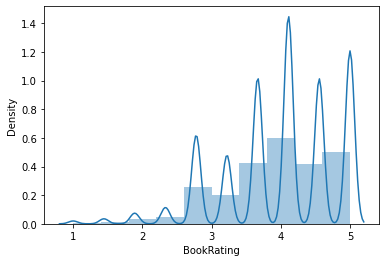

In [ ]:
sns.distplot(datacopyf1['BookRating'],bins=10);

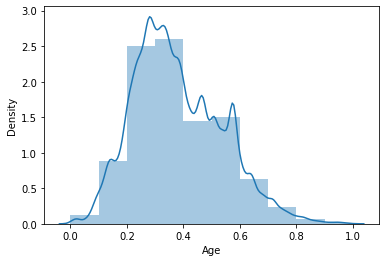

In [ ]:
#Min-Max Normalization: Age
scaler = MinMaxScaler()
scaler.fit(datacopyf1['Age'].values.reshape(-1,1))
datacopyf1['Age'] = scaler.transform(datacopyf1['Age'].values.reshape(-1,1))
sns.distplot(datacopyf1['Age'],bins=10);

## Z- score Normalization

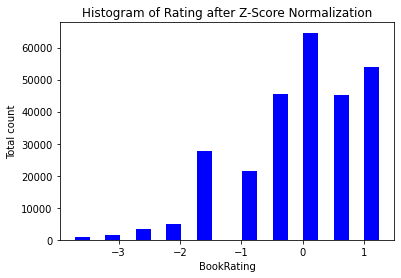

In [ ]:
scaler = StandardScaler()
scaler.fit(datacopyf2['BookRating'].values.reshape(-1,1))
datacopyf2['BookRating'] = scaler.transform(datacopyf2['BookRating'].values.reshape(-1,1))
plothist(datacopyf2,'BookRating','Histogram of Rating after Z-Score Normalization')

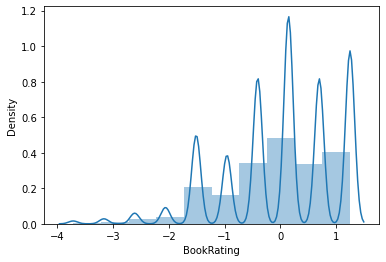

In [ ]:
sns.distplot(datacopyf2['BookRating'],bins=10);

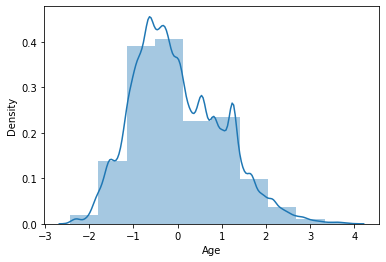

In [ ]:
# Z-score: AGE
scaler = StandardScaler()
scaler.fit(datacopyf2['Age'].values.reshape(-1,1))
datacopyf2['Age'] = scaler.transform(datacopyf2['Age'].values.reshape(-1,1))
sns.distplot(datacopyf2['Age'],bins=10);

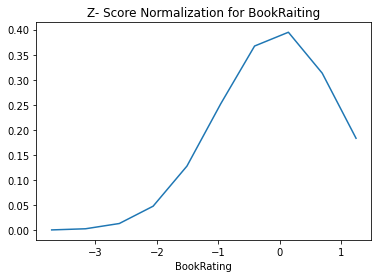

In [ ]:
#bell shape plot:
pylab.rcParams['figure.figsize'] = (6.0, 4.0)
ax = plt.subplot(111)
x= np.sort(datacopyf2['BookRating'])
ax.plot(x,stats.norm.pdf(x))
plt.xlabel('BookRating')
plt.title('Z- Score Normalization for BookRaiting')
plt.show()

## Decimal Scaling:

In [ ]:
p = datacopyf3.BookRating.max()
q = len(str(abs(p)))
for i in range(len(datacopyf3['BookRating'])):
  datacopyf3['BookRating'].iloc[i] = datacopyf3['BookRating'].iloc[i]/(10**q)

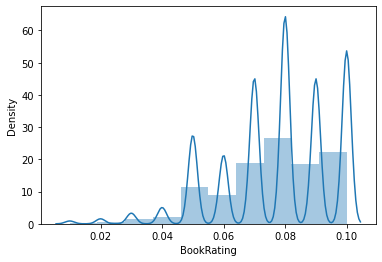

In [ ]:
sns.distplot(datacopyf3['BookRating'],bins=10);

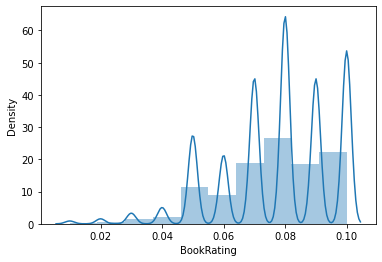

In [ ]:
p = datacopyf3.Age.max()
q = len(str(abs(p)))
for i in range(len(datacopyf3['Age'])):
  datacopyf3['Age'].iloc[i] = datacopyf3['Age'].iloc[i]/(10**q)

sns.distplot(datacopyf3['BookRating'],bins=10);

#Transformation:


### Actual Data:


In [ ]:
data['BookRating'].agg(['skew', 'kurtosis']).transpose()

skew       -0.723955
kurtosis    0.243986
Name: BookRating, dtype: float64

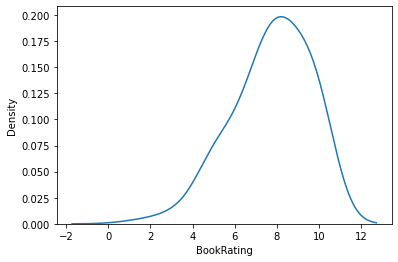

In [ ]:
sns.kdeplot(data['BookRating'],bw_method=0.5)

In [ ]:
data['Age'].agg(['skew', 'kurtosis']).transpose()

skew        0.496685
kurtosis   -0.068720
Name: Age, dtype: float64

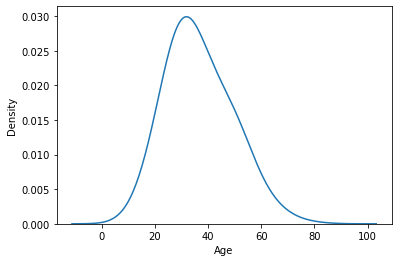

In [ ]:
sns.kdeplot(data['Age'],bw_method=0.5)

## Square Root Transformation:

In [ ]:
datacopyf4.insert(len(datacopyf4.columns), 'square_root',
         np.sqrt(datacopyf4.iloc[:,2]))

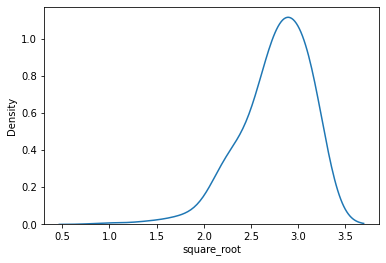

In [ ]:
sns.kdeplot(datacopyf4['square_root'],bw_method=0.5)

In [ ]:
datacopyf4.head()

,UserID,ISBN,BookRating,Location,Age,Book-Title,BookAuthor,YearOfPublication,Publisher,square_root
0,2313,034545104X,5,"cincinnati, ohio, usa",23,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,2.236068
1,8680,034545104X,5,"st. charles county, missouri, usa",37,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,2.236068
2,77480,034545104X,8,"gig harbor, washington, usa",51,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,2.828427
3,94362,034545104X,5,"northridge, california, usa",39,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,2.236068
4,98391,034545104X,9,"morrow, georgia, usa",52,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,3.000000


In [ ]:
datacopyf4['square_root'].agg(['skew', 'kurtosis']).transpose()

skew       -1.236429
kurtosis    2.337581
Name: square_root, dtype: float64

In [ ]:
datacopyf4.insert(len(datacopyf4.columns), 'square_root_Age',
         np.sqrt(datacopyf4.iloc[:,4]))

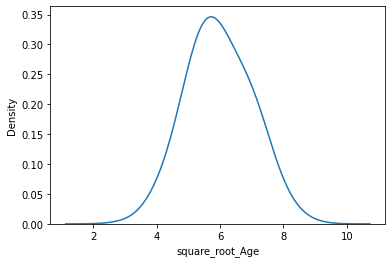

In [ ]:
sns.kdeplot(datacopyf4['square_root_Age'],bw_method=0.5)

In [ ]:
datacopyf4['square_root_Age'].agg(['skew', 'kurtosis']).transpose()

skew        0.073462
kurtosis   -0.274513
Name: square_root_Age, dtype: float64

## Natural Logarithmic Transformation

In [ ]:
datacopyf4.insert(len(datacopyf4.columns), 'log',
         np.log(datacopyf4.iloc[:,2]))

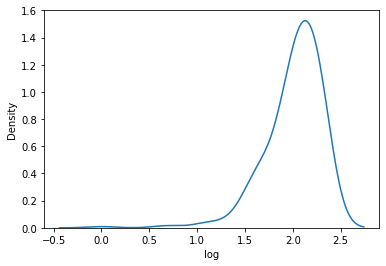

In [ ]:
sns.kdeplot(datacopyf4['log'],bw_method=0.5)

In [ ]:
datacopyf4['log'].agg(['skew', 'kurtosis']).transpose()

skew       -2.181383
kurtosis    8.722445
Name: log, dtype: float64

In [ ]:
datacopyf4.insert(len(datacopyf4.columns), 'log_Age',
         np.log(datacopyf4.iloc[:,4]))

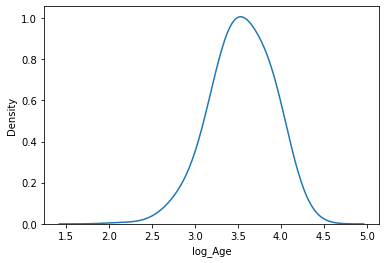

In [ ]:
sns.kdeplot(datacopyf4['log_Age'],bw_method=0.5)

In [ ]:
datacopyf4['log_Age'].agg(['skew', 'kurtosis']).transpose()

skew       -0.423916
kurtosis    0.321697
Name: log_Age, dtype: float64

# Exploratory Data Analysis:

## Analysing UserID Attribute:

In [ ]:
print("The length of USer ID is:", len(data['UserID']))
print("Total Number of Unique user are:",len(data['UserID'].unique()))

The length of USer ID is: 268810
Total Number of Unique user are: 40447


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'User-ID')]

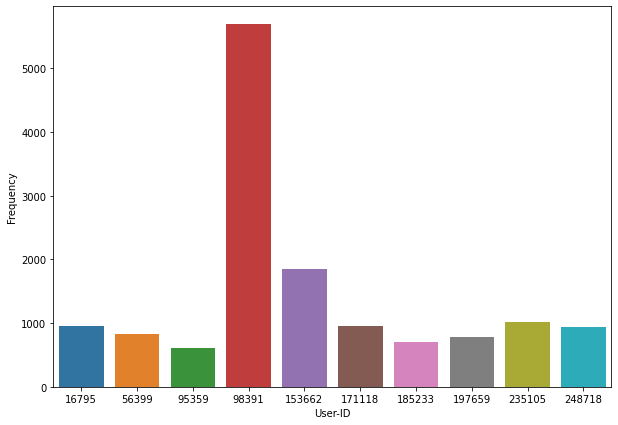

In [ ]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(10,7))
sns.barplot(x=data['UserID'].value_counts()[:10].index, y=data['UserID'].value_counts()[:10]) 
ax.set(xlabel='User-ID', ylabel='Frequency')

In [ ]:
print(data['UserID'].value_counts().mean())
print("One can check for outliers in UserID as the mean is around 6, which states that each user has rated around 6 books")

6.645981160531066
One can check for outliers in UserID as the mean is around 6, which states that each user has rated around 6 books


## Analysing Book Rating"

In [ ]:
print("counting the total books against each rating:\nRating \t count\n",data['BookRating'].value_counts())

counting the total books against each rating:
Rating 	 count
 8     64625
10    53830
7     45395
9     45149
5     27616
6     21374
4      5073
3      3313
2      1557
1       878
Name: BookRating, dtype: int64


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Book Rating')]

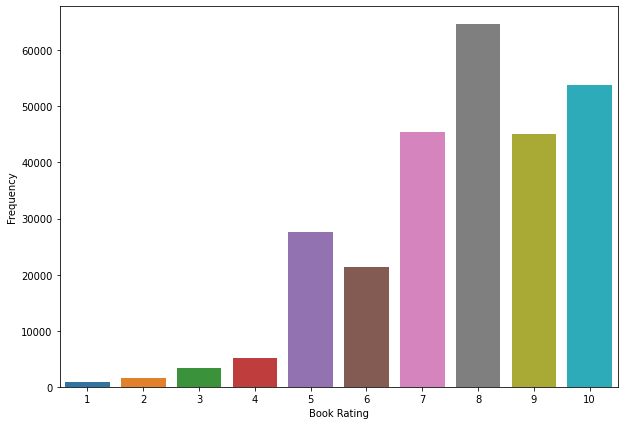

In [ ]:
fig, ax = pyplot.subplots(figsize=(10,7))
sns.barplot(x=data['BookRating'].value_counts().index, y=data['BookRating'].value_counts())
ax.set(xlabel='Book Rating', ylabel='Frequency')

From the above plot, most of the books are rated above 6, very litte books are rated bwteen 1-4.

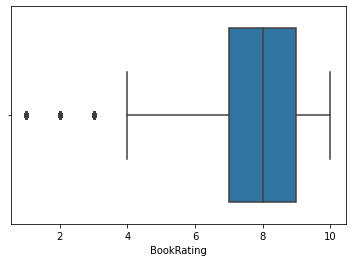

In [ ]:
sns.boxplot(data['BookRating'])

From the above boxplot, most of the book rating lies in between 7-9.

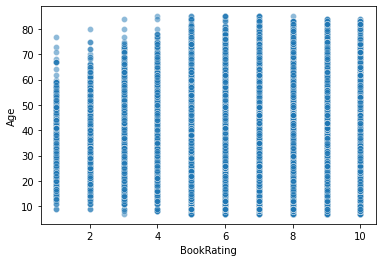

In [ ]:
sns.scatterplot(y='Age',x='BookRating',data=data,alpha=0.5)

## Analysing User Location:

In [ ]:
city =list()
state= list()
country = list()
for i in range(len(data)):
  splitLoc= data['Location'].iloc[i].split(',')
  city.append(splitLoc[0])
  state.append(splitLoc[1])
  country.append(splitLoc[2])

data['city']=city
data['state']=state
data['country']= country

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Location-city')]

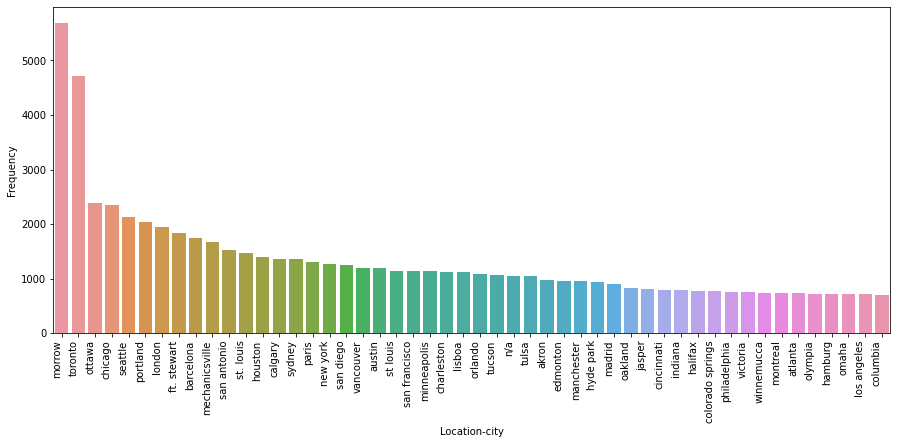

In [ ]:
#plotting bar plot for userlocation: city
fig, ax = plt.subplots(figsize = (15,6))    
fig = sns.barplot(x = data['city'].value_counts().index[:50], y = data['city'].value_counts()[:50], ci = None, ax=ax)
ax.set_xticklabels(labels=data['city'].value_counts().index, rotation=90, ha='right');
ax.set(xlabel='Location-city', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Location-state')]

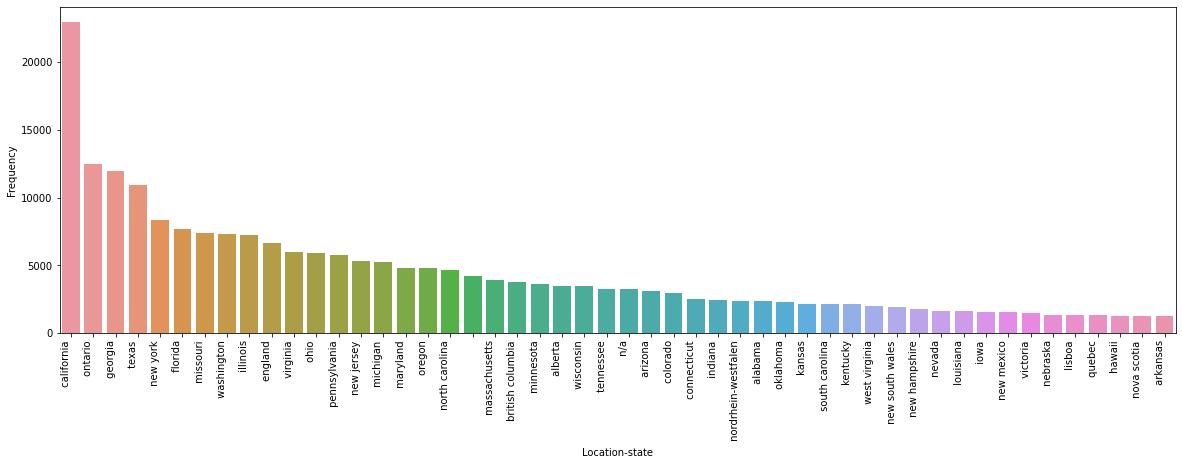

In [ ]:
#plotting bar plot for userlocation: state
fig, ax = plt.subplots(figsize = (20,6))    
fig = sns.barplot(x = data['state'].value_counts().index[:50], y = data['state'].value_counts()[:50], ci = None, ax=ax)
ax.set_xticklabels(labels=data['state'].value_counts().index, rotation=90, ha='right');
ax.set(xlabel='Location-state', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Location: country')]

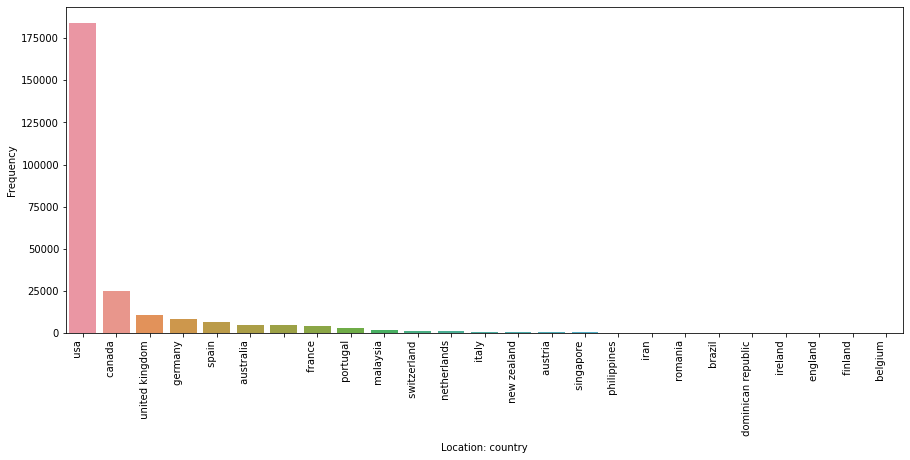

In [ ]:
#plotting bar plot for userlocation: country
fig, ax = plt.subplots(figsize = (15,6))    
fig = sns.barplot(x = data['country'].value_counts().index[:25], y = data['country'].value_counts()[:25], ci = None, ax=ax)
ax.set_xticklabels(labels=data['country'].value_counts().index, rotation=90, ha='right');
ax.set(xlabel='Location: country', ylabel='Frequency')

## Analysisng Book Author:

In [ ]:
print("counting the books written by each author:\nAuthor\t\tCount\n ")
data["BookAuthor"].value_counts().sort_values(ascending=False).head()

counting the books written by each author:
Author		Count
 


Stephen King       3473
Nora Roberts       2131
John Grisham       1665
James Patterson    1555
J. K. Rowling      1366
Name: BookAuthor, dtype: int64

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Book Author')]

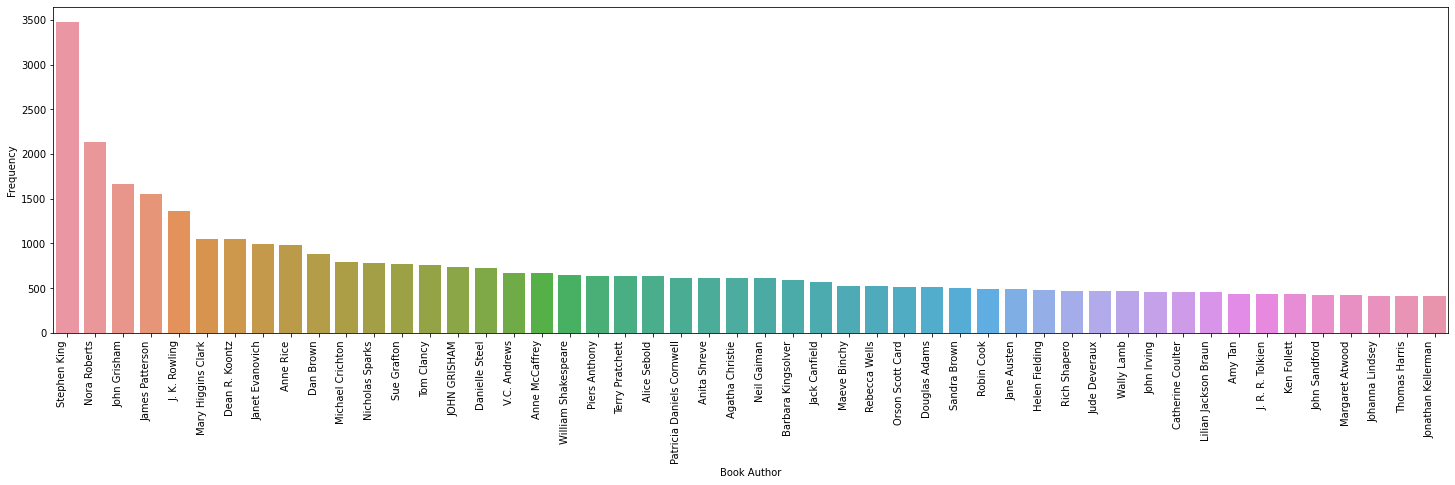

In [ ]:
#plotting top 50 Writers:
fig, ax = plt.subplots(figsize = (25,6))    
fig = sns.barplot(x = data['BookAuthor'].value_counts().index[:50], y = data['BookAuthor'].value_counts()[:50], ci = None, ax=ax)
ax.set_xticklabels(labels=data['BookAuthor'].value_counts().index, rotation=90, ha='right');
ax.set(xlabel='Book Author', ylabel='Frequency')

## Analysis Year of Publication:


In [ ]:
print("counting the total books published against each year \n Year \t Count\n")
data['YearOfPublication'].value_counts()

counting the total books published against each year 
 Year 	 Count



2002    25952
2003    22860
2001    22026
1999    19816
2000    19267
        ...  
1928        1
1934        1
1902        1
2006        1
1900        1
Name: YearOfPublication, Length: 89, dtype: int64

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Year Of Publication')]

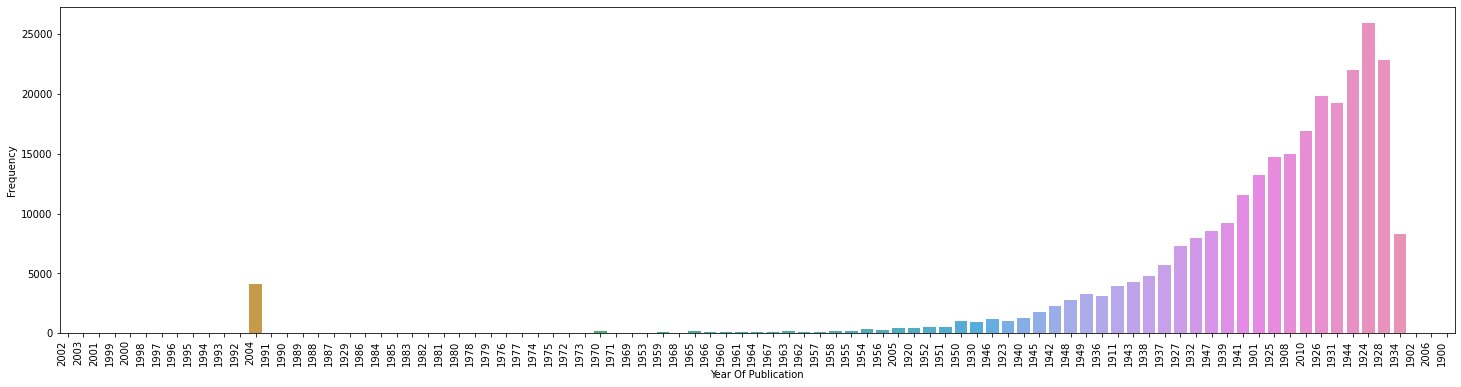

In [ ]:
fig, ax = plt.subplots(figsize = (25,6))    
fig = sns.barplot(x = data['YearOfPublication'].value_counts().index, y = data['YearOfPublication'].value_counts(), ci = None, ax=ax)
ax.set_xticklabels(labels=data['YearOfPublication'].value_counts().index, rotation=90, ha='right');
ax.set(xlabel='Year Of Publication', ylabel='Frequency')

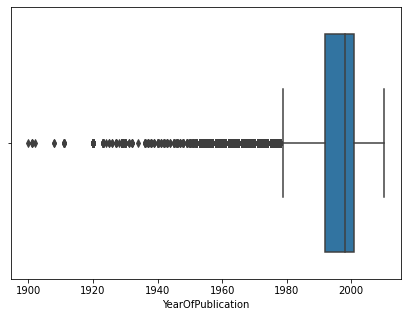

In [ ]:
fig, ax = pyplot.subplots(figsize=(7,5))
sns.boxplot(data['YearOfPublication'])

from the above plot, one can see that most of the books are published between 1990-2010.

## Analysis Book Publisher:

In [ ]:
print("counting the total books published by each publisher \n Publisher \t Count\n")
data['Publisher'].value_counts().head()

counting the total books published by each publisher 
 Publisher 	 Count



Ballantine Books            8519
Pocket                      7287
Berkley Publishing Group    6207
Warner Books                5930
Bantam                      5198
Name: Publisher, dtype: int64

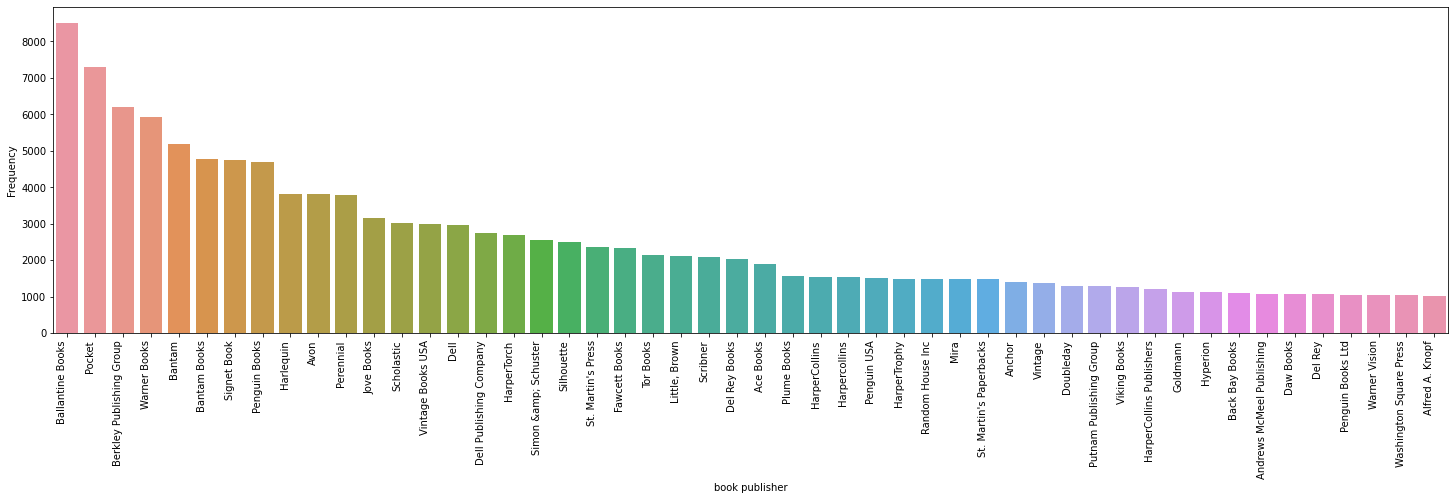

In [ ]:
#plotting top 50 Publishers:
fig, ax = plt.subplots(figsize = (25,6))    
fig = sns.barplot(x = data['Publisher'].value_counts().index[:50], y = data['Publisher'].value_counts()[:50], ci = None, ax=ax)
ax.set(xlabel='book publisher', ylabel='Frequency')
ax.set_xticklabels(labels=data['Publisher'].value_counts().index, rotation=90, ha='right');

# MODELS:


## MIN- MAX Normalization:

### Supervised Learing:

In [ ]:

#splitting location into City state and country:
datacopyf1['city']=city
datacopyf1['state']=state
datacopyf1['country']= country

#converting to non numeric data to category
datacopyf1.Publisher = pd.Categorical(datacopyf1.Publisher)
datacopyf1['PublisherCode'] = datacopyf1.Publisher.cat.codes
datacopyf1.BookAuthor = pd.Categorical(datacopyf1.BookAuthor)
datacopyf1['BookAuthorCode'] = datacopyf1.BookAuthor.cat.codes
datacopyf1['Book-Title'] = pd.Categorical(datacopyf1['Book-Title'])
datacopyf1['BookTitleCode'] = datacopyf1['Book-Title'].cat.codes


datacopyf1.city = pd.Categorical(datacopyf1.city)
datacopyf1['citycode'] = datacopyf1.city.cat.codes
datacopyf1.state = pd.Categorical(datacopyf1.state)
datacopyf1['statecode'] = datacopyf1.state.cat.codes
datacopyf1.country = pd.Categorical(datacopyf1.country)
datacopyf1['countrycode'] = datacopyf1.country.cat.codes

In [ ]:
for i in range(len(datacopyf1)):
  if datacopyf1['BookRating'][i]>=0.0 and datacopyf1['BookRating'][i]<=2.5:
    datacopyf1['BookRating'].loc[i]= "Low"
  elif datacopyf1['BookRating'][i]>2.5 and datacopyf1['BookRating'][i]<=3.75:
    datacopyf1['BookRating'].loc[i] = "Med"
  else:
    datacopyf1['BookRating'].loc[i] = "High"

In [ ]:
# Identifying the predictor variable(x) and Target Variable
X = datacopyf1[["Age",'PublisherCode','BookAuthorCode','BookTitleCode','citycode', 'countrycode', 'statecode']]
y = datacopyf1["BookRating"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25,random_state=42)

#### K-Nearest Neighbor (for Min-Max Normalization): 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)

[[29817   240 10847]
 [ 1799    66   778]
 [16132   176  7348]]


              precision    recall  f1-score   support

        High       0.62      0.73      0.67     40904
         Low       0.14      0.02      0.04      2643
         Med       0.39      0.31      0.34     23656

    accuracy                           0.55     67203
   macro avg       0.38      0.35      0.35     67203
weighted avg       0.52      0.55      0.53     67203



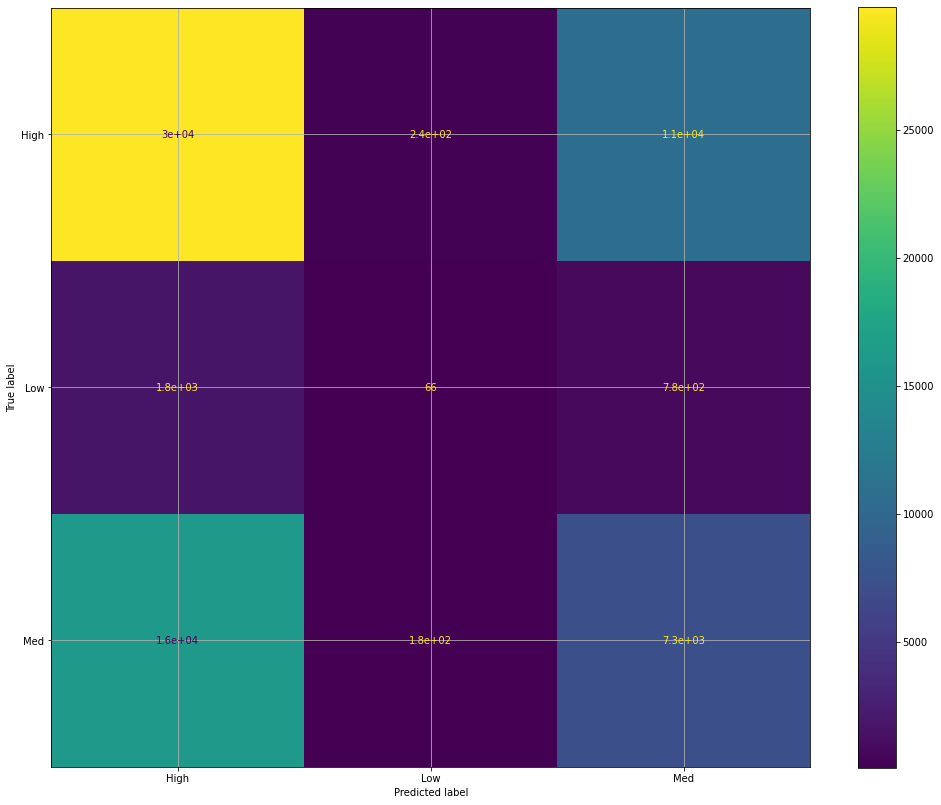

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

print(confusion_matrix(Y_test,pred))
print('\n')
var=classification_report(Y_test,pred)
print(var)

figure, axis = plt.subplots(figsize=(17,14))
plt.grid(b=None)
plot_confusion_matrix(knn, X_test, Y_test, ax=axis)

#### Decision Tree (for Min-Max Normilazation):

In [ ]:
!pip install pydotplus

In [ ]:
!pip install graphviz

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pydotplus
from IPython.display import Image
from sklearn import tree

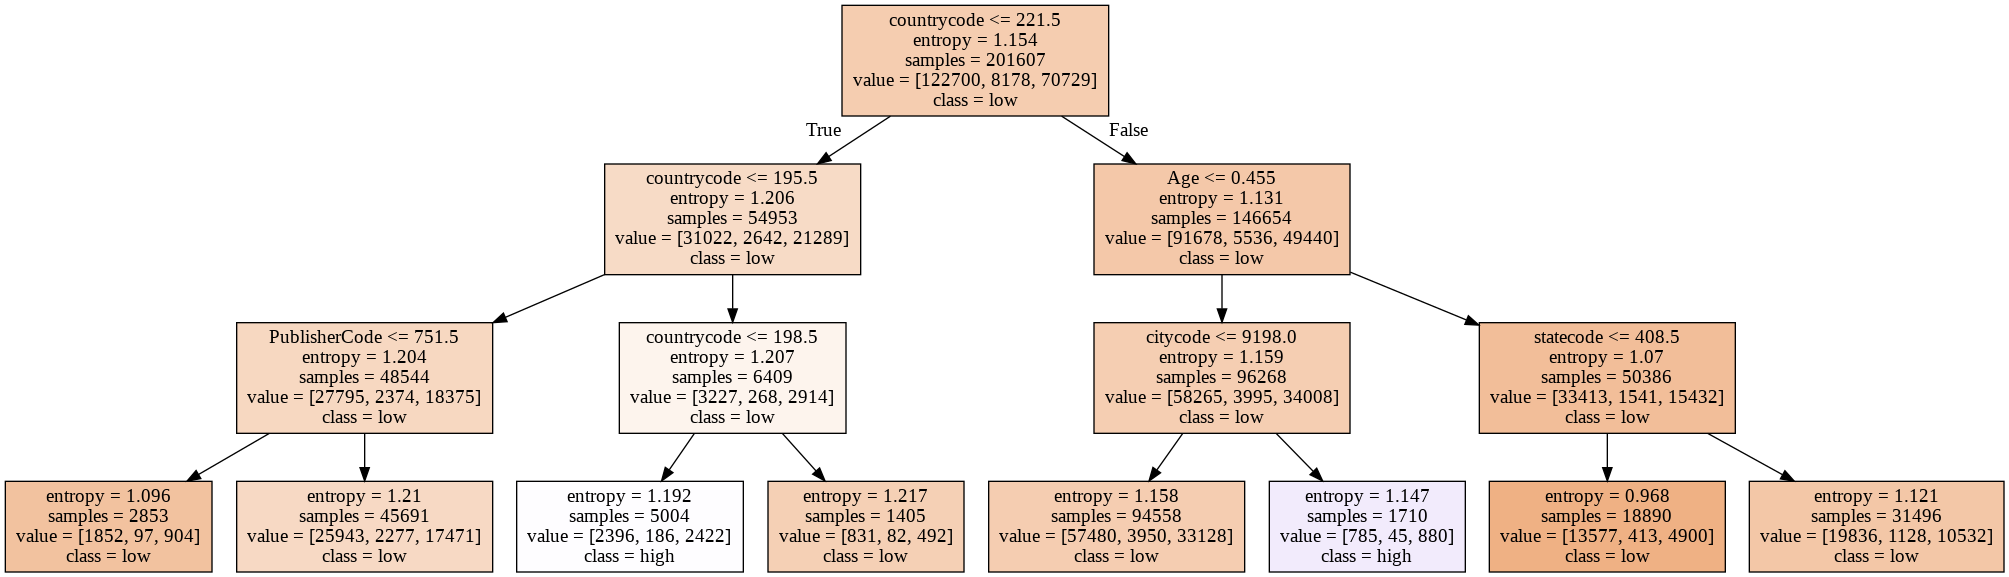

In [ ]:
Dtree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
Dtree = Dtree.fit(X_train, Y_train)
dot_data = tree.export_graphviz(Dtree, feature_names=X.columns, class_names=['low','med','high'], filled=True,out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('decisionTree(MinMax).png')
Image(graph.create_png())

[[39815     0  1089]
 [ 2559     0    84]
 [22536     0  1120]]


              precision    recall  f1-score   support

        High       0.61      0.97      0.75     40904
         Low       0.00      0.00      0.00      2643
         Med       0.49      0.05      0.09     23656

    accuracy                           0.61     67203
   macro avg       0.37      0.34      0.28     67203
weighted avg       0.55      0.61      0.49     67203



Text(0.5, 1.0, 'Deciosin Tree Confusion matrix')

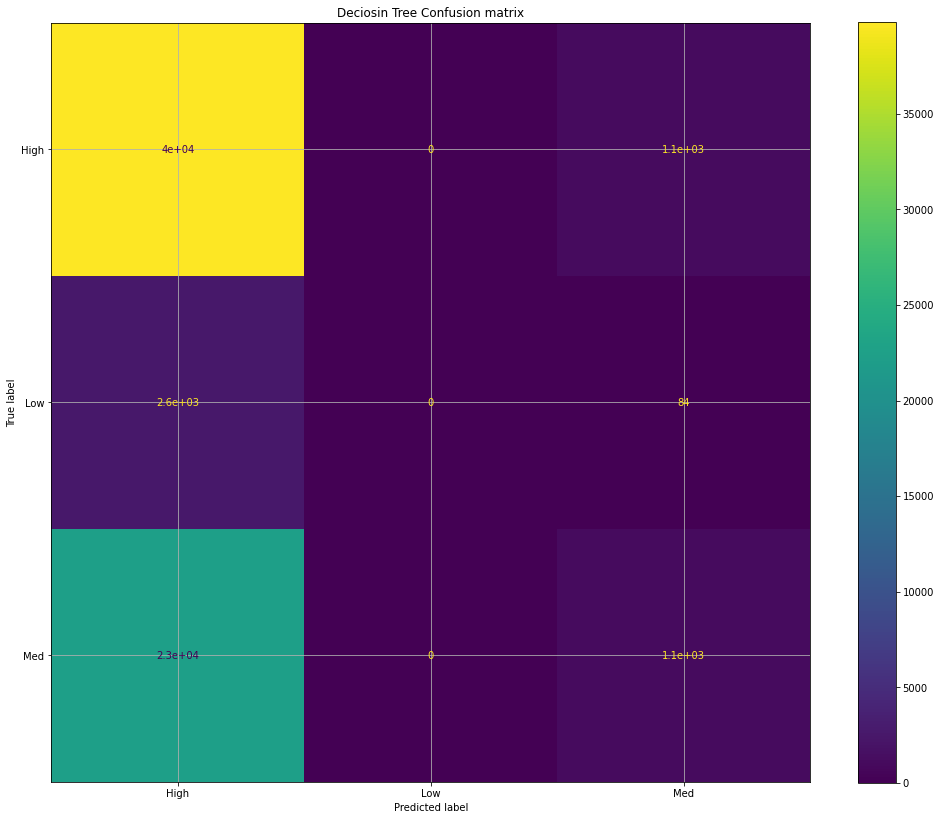

In [ ]:
DecisionTreepredictedY = Dtree.predict(X_test)
print(confusion_matrix(Y_test,DecisionTreepredictedY))
print('\n')
var=classification_report(Y_test,DecisionTreepredictedY)
print(var)


figure, axis = plt.subplots(figsize=(17,14))
plt.grid(b=None)
plot_confusion_matrix(Dtree, X_test, Y_test, ax=axis)
plt.title("Deciosin Tree Confusion matrix")

### Unsupervised Learning:

####k-Means (for Min Max Normalization):

In [ ]:
datacopyf1['BookRating'] = pd.Categorical(datacopyf1['BookRating'])
datacopyf1['BookRatingCode'] = datacopyf1['BookRating'].cat.codes

In [ ]:
y_encoded= datacopyf1['BookRatingCode']
#datacol = datacopyf1[["Age",'PublisherCode','BookAuthorCode','BookTitleCode','citycode', 'countrycode', 'statecode','BookRatingCode']]
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,test_size=0.25,random_state=42)

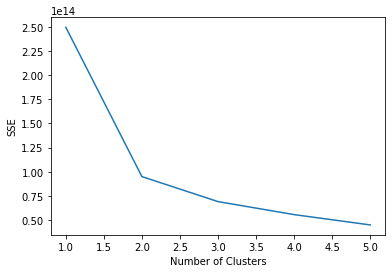

              precision    recall  f1-score   support

           0       0.61      0.17      0.27     40904
           1       0.04      0.20      0.07      2643
           2       0.35      0.25      0.29     23656
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.20     67203
   macro avg       0.20      0.12      0.13     67203
weighted avg       0.49      0.20      0.27     67203



In [ ]:
import pandas as pd
from sklearn import cluster
import numpy as np
import matplotlib.pyplot as plt

k_means = cluster.KMeans(n_clusters=3, max_iter=50, random_state=1).fit(X_train)
labels = k_means.labels_

numClusters = [1,2,3,4,5]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(X_train)
    SSE.append(k_means.inertia_)
#Sum of squared distances of samples to their closest cluster center.

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()


Kmeanspredicted = k_means.predict(X_test)
Kmeanspredicted.reshape(-1,1)

var=classification_report(y_test,Kmeanspredicted)
print(var)

#### Hierarchy Clustering(Min-Max Normalization):

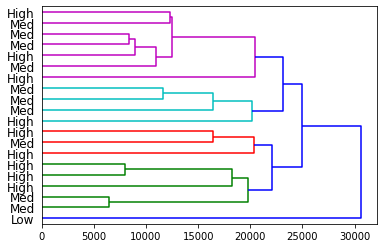

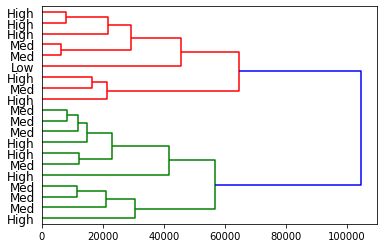

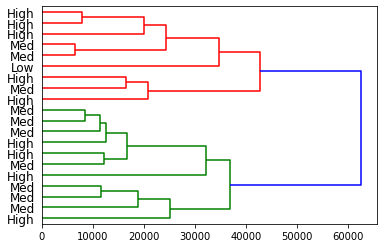

In [ ]:
import pandas as pd
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
X_refined = X_train[:20]
names = datacopyf1['BookRating']
Z = hierarchy.linkage(X_refined, 'single')
dend = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')
plt.show()
Z = hierarchy.linkage(X_refined, 'complete')
dend = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')
plt.show()
Z = hierarchy.linkage(X_refined, 'average')
dend = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')
plt.show()

## Z- score Normalization

### Supervised Learning:


#### K- nearest Neighbor(on Z- score):

In [ ]:
#splitting location into City state and country:
datacopyf2['city']=city
datacopyf2['state']=state
datacopyf2['country']= country

#converting to non numeric data to category
datacopyf2.Publisher = pd.Categorical(datacopyf2.Publisher)
datacopyf2['PublisherCode'] = datacopyf2.Publisher.cat.codes
datacopyf2.BookAuthor = pd.Categorical(datacopyf2.BookAuthor)
datacopyf2['BookAuthorCode'] = datacopyf2.BookAuthor.cat.codes
datacopyf2['Book-Title'] = pd.Categorical(datacopyf2['Book-Title'])
datacopyf2['BookTitleCode'] = datacopyf2['Book-Title'].cat.codes


datacopyf2.city = pd.Categorical(datacopyf2.city)
datacopyf2['citycode'] = datacopyf2.city.cat.codes
datacopyf2.state = pd.Categorical(datacopyf2.state)
datacopyf2['statecode'] = datacopyf2.state.cat.codes
datacopyf2.country = pd.Categorical(datacopyf2.country)
datacopyf2['countrycode'] = datacopyf2.country.cat.codes

In [ ]:
print (sorted(datacopyf2['BookRating'].unique()))

[-3.714404630550603, -3.1631123754728385, -2.611820120395074, -2.0605278653173094, -1.5092356102395452, -0.9579433551617808, -0.4066511000840163, 0.14464115499374816, 0.6959334100715125, 1.247225665149277]


In [ ]:
for i in range(len(datacopyf2)):
  if datacopyf2['BookRating'][i]>=-3.8 and datacopyf2['BookRating'][i]<=-1.50:
    datacopyf2['BookRating'].loc[i]= "Low"
  elif datacopyf2['BookRating'][i]>-1.50 and datacopyf2['BookRating'][i]<=0.08:
    datacopyf2['BookRating'].loc[i] = "Med"
  else:
    datacopyf2['BookRating'].loc[i] = "High"

In [ ]:
# Identifying the predictor variable(x) and Target Variable
X = datacopyf2[["Age",'PublisherCode','BookAuthorCode','BookTitleCode','citycode', 'countrycode', 'statecode']]
y = datacopyf2["BookRating"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
#Knn model:
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train,Y_train)
pred = kNN.predict(X_test)

[[32753  2181  5970]
 [ 7167   869  1542]
 [12798  1027  2896]]


              precision    recall  f1-score   support

        High       0.62      0.80      0.70     40904
         Low       0.21      0.09      0.13      9578
         Med       0.28      0.17      0.21     16721

    accuracy                           0.54     67203
   macro avg       0.37      0.35      0.35     67203
weighted avg       0.48      0.54      0.50     67203



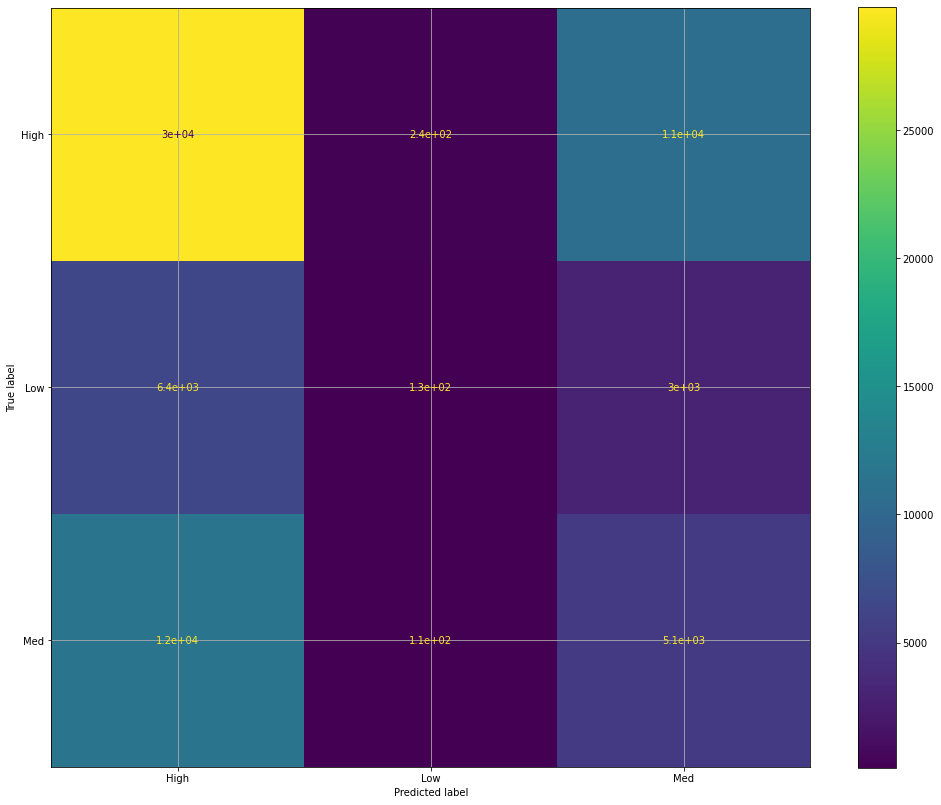

In [ ]:
#Plotting:
print(confusion_matrix(Y_test,pred))
print('\n')
var=classification_report(Y_test,pred)
print(var)

figure, axis = plt.subplots(figsize=(17,14))
plt.grid(b=None)
plot_confusion_matrix(knn, X_test, Y_test, ax=axis)

#### Decison Tree(Z- score Noramlization):

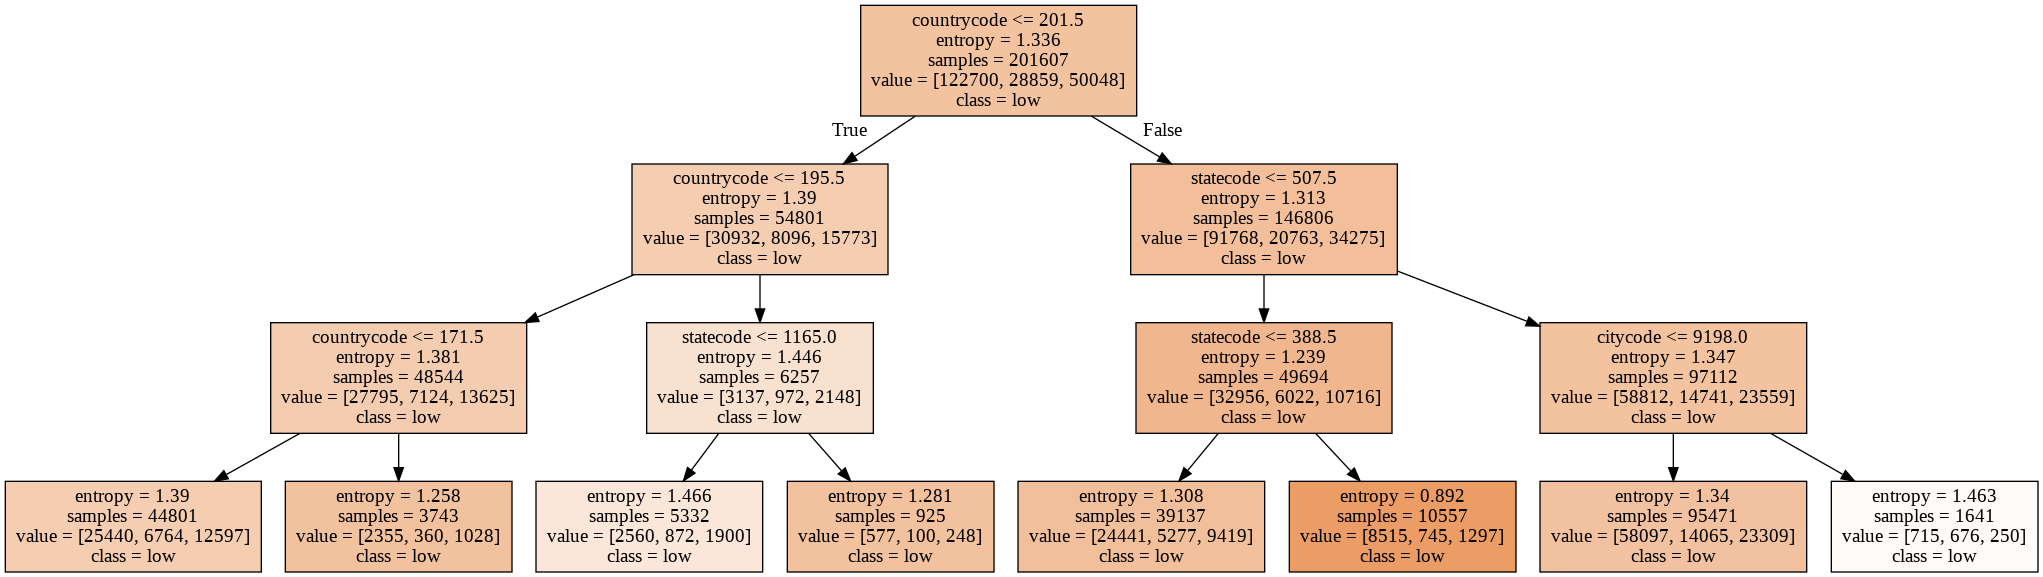

In [ ]:
#Decison Tree model
Dtree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
Dtree = Dtree.fit(X_train, Y_train)
dot_data = tree.export_graphviz(Dtree, feature_names=X.columns, class_names=['low','med','high'], filled=True,out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('decisionTree(z-score).png')
Image(graph.create_png())

[[40904     0     0]
 [ 9578     0     0]
 [16721     0     0]]


              precision    recall  f1-score   support

        High       0.61      1.00      0.76     40904
         Low       0.00      0.00      0.00      9578
         Med       0.00      0.00      0.00     16721

    accuracy                           0.61     67203
   macro avg       0.20      0.33      0.25     67203
weighted avg       0.37      0.61      0.46     67203



Text(0.5, 1.0, 'Deciosin Tree Confusion matrix')

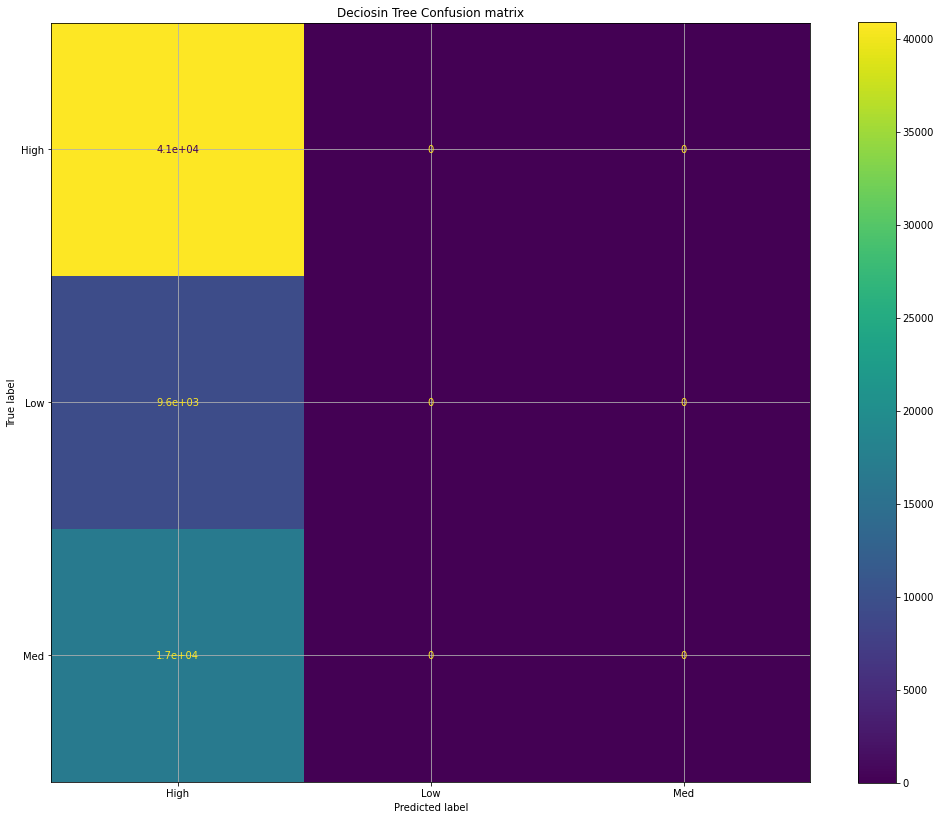

In [ ]:
#plotting:
DecisionTreepredictedY = Dtree.predict(X_test)
print(confusion_matrix(Y_test,DecisionTreepredictedY))
print('\n')
var=classification_report(Y_test,DecisionTreepredictedY)
print(var)

figure, axis = plt.subplots(figsize=(17,14))
plt.grid(b=None)
plot_confusion_matrix(Dtree, X_test, Y_test, ax=axis)
plt.title("Deciosin Tree Confusion matrix")

### Unsupervised Learning:


#### K-Means:(Z-Score Normalization):

In [ ]:
# Identifying the Traget Variable:
datacopyf2['BookRating'] = pd.Categorical(datacopyf2['BookRating'])
datacopyf2['BookRatingCode'] = datacopyf2['BookRating'].cat.codes
y_encoded= datacopyf2['BookRatingCode']
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,test_size=0.25,random_state=42)

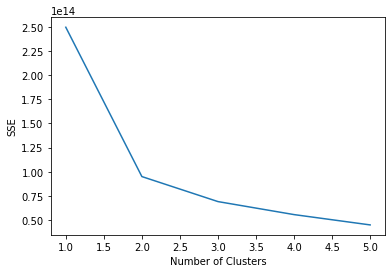

              precision    recall  f1-score   support

           0       0.61      0.20      0.30     40904
           1       0.14      0.25      0.18      9578
           2       0.24      0.19      0.22     16721
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.21     67203
   macro avg       0.20      0.13      0.14     67203
weighted avg       0.45      0.21      0.27     67203



In [ ]:
# Kmeans model:
k_means = cluster.KMeans(n_clusters=3, max_iter=50, random_state=1).fit(X_train)
labels = k_means.labels_

numClusters = [1,2,3,4,5]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(X_train)
    SSE.append(k_means.inertia_)
#Sum of squared distances of samples to their closest cluster center.
#plotting:
plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()


Kmeanspredicted = k_means.predict(X_test)
Kmeanspredicted.reshape(-1,1)

var=classification_report(y_test,Kmeanspredicted)
print(var)

#### Hierarchy Clustering(Z-ScoreNormalization):

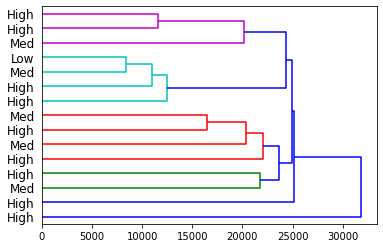

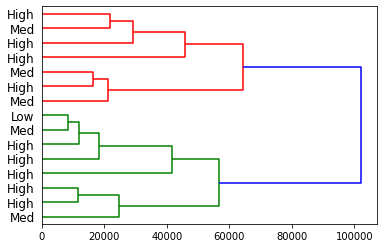

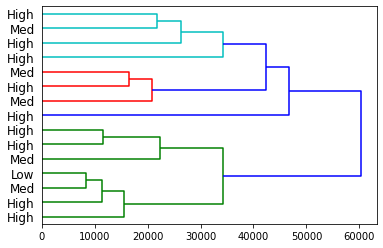

In [ ]:
# Slicing Predictor variable:
x_reduced= X_train[:15]
names = datacopyf2['BookRating']
#Hierarchy Model:
Z = hierarchy.linkage(x_reduced, 'single')
dend = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')
plt.show()
Z = hierarchy.linkage(x_reduced, 'complete')
dend = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')
plt.show()
Z = hierarchy.linkage(x_reduced, 'average')
dend = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')
plt.show()

## Decimal Scaling:


### Supervised Learning


#### K-nearest Neighbor(for Decimal Scaling)

In [ ]:
#splitting location into City state and country:
datacopyf3['city']=city
datacopyf3['state']=state
datacopyf3['country']= country

#converting to non numeric data to category
datacopyf3.Publisher = pd.Categorical(datacopyf3.Publisher)
datacopyf3['PublisherCode'] = datacopyf3.Publisher.cat.codes
datacopyf3.BookAuthor = pd.Categorical(datacopyf3.BookAuthor)
datacopyf3['BookAuthorCode'] = datacopyf3.BookAuthor.cat.codes
datacopyf3['Book-Title'] = pd.Categorical(datacopyf3['Book-Title'])
datacopyf3['BookTitleCode'] = datacopyf3['Book-Title'].cat.codes


datacopyf3.city = pd.Categorical(datacopyf3.city)
datacopyf3['citycode'] = datacopyf3.city.cat.codes
datacopyf3.state = pd.Categorical(datacopyf3.state)
datacopyf3['statecode'] = datacopyf3.state.cat.codes
datacopyf3.country = pd.Categorical(datacopyf3.country)
datacopyf3['countrycode'] = datacopyf3.country.cat.codes

In [ ]:
print (sorted(datacopyf3['BookRating'].unique()))

[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]


In [ ]:
for i in range(len(datacopyf3)):
  if datacopyf3['BookRating'][i]>=0.00 and datacopyf3['BookRating'][i]<=0.05:
    datacopyf3['BookRating'].loc[i]= "Low"
  elif datacopyf3['BookRating'][i]>0.05 and datacopyf3['BookRating'][i]<=0.075:
    datacopyf3['BookRating'].loc[i] = "Med"
  else:
    datacopyf3['BookRating'].loc[i] = "High"

In [ ]:
# Identifying the predictor variable(x) and Target Variable
X = datacopyf3[["Age",'PublisherCode','BookAuthorCode','BookTitleCode','citycode', 'countrycode', 'statecode']]
y = datacopyf3["BookRating"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
#Knn model:
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train,Y_train)
pred = kNN.predict(X_test)

[[32753  2181  5970]
 [ 7167   869  1542]
 [12797  1027  2897]]


              precision    recall  f1-score   support

        High       0.62      0.80      0.70     40904
         Low       0.21      0.09      0.13      9578
         Med       0.28      0.17      0.21     16721

    accuracy                           0.54     67203
   macro avg       0.37      0.35      0.35     67203
weighted avg       0.48      0.54      0.50     67203



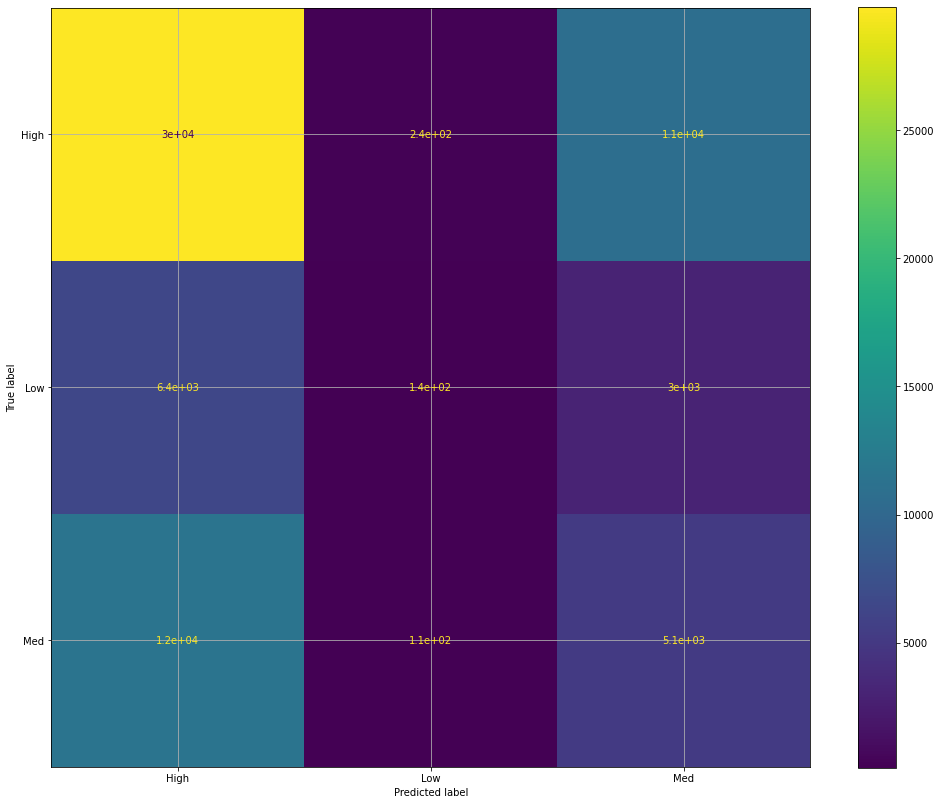

In [ ]:
#Plotting:
print(confusion_matrix(Y_test,pred))
print('\n')
var=classification_report(Y_test,pred)
print(var)

figure, axis = plt.subplots(figsize=(17,14))
plt.grid(b=None)
plot_confusion_matrix(knn, X_test, Y_test, ax=axis)

#### Decison Tree(Decimal Scaling):

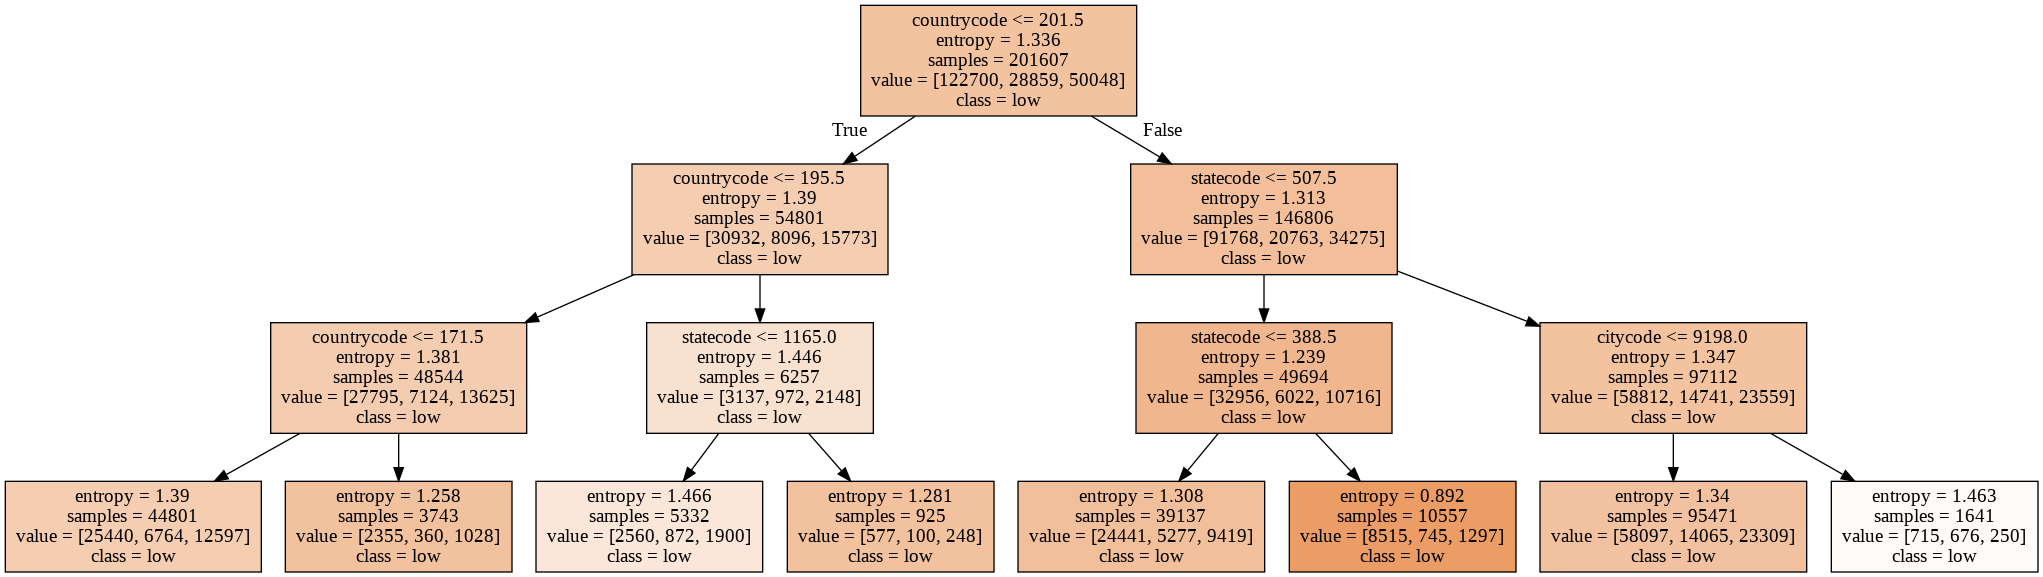

In [ ]:
#Decison Tree model
Dtree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
Dtree = Dtree.fit(X_train, Y_train)
dot_data = tree.export_graphviz(Dtree, feature_names=X.columns, class_names=['low','med','high'], filled=True,out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('decisionTree(Decimal Scaling).png')
Image(graph.create_png())

[[40904     0     0]
 [ 9578     0     0]
 [16721     0     0]]


              precision    recall  f1-score   support

        High       0.61      1.00      0.76     40904
         Low       0.00      0.00      0.00      9578
         Med       0.00      0.00      0.00     16721

    accuracy                           0.61     67203
   macro avg       0.20      0.33      0.25     67203
weighted avg       0.37      0.61      0.46     67203



Text(0.5, 1.0, 'Deciosin Tree Confusion matrix')

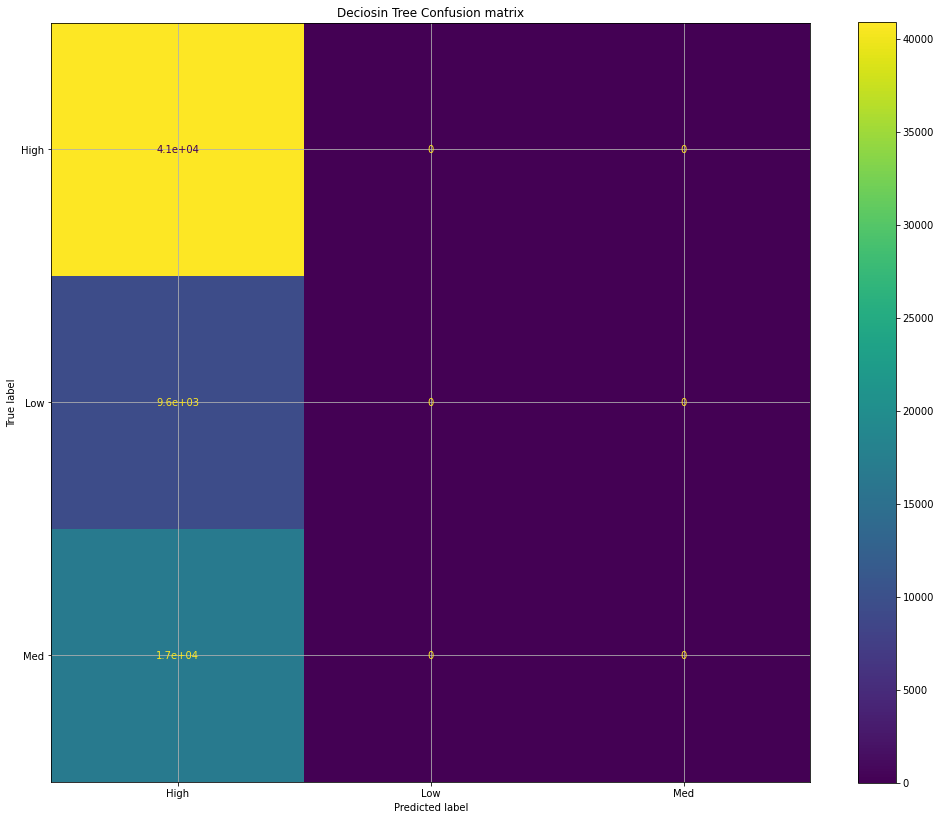

In [ ]:
#plotting:
DecisionTreepredictedY = Dtree.predict(X_test)
print(confusion_matrix(Y_test,DecisionTreepredictedY))
print('\n')
var=classification_report(Y_test,DecisionTreepredictedY)
print(var)

figure, axis = plt.subplots(figsize=(17,14))
plt.grid(b=None)
plot_confusion_matrix(Dtree, X_test, Y_test, ax=axis)
plt.title("Deciosin Tree Confusion matrix")

### Unsupervised Learning:


#### K-Means:(Decimal-Scaling Normalization):

In [ ]:
# Identifying the Traget Variable:
datacopyf3['BookRating'] = pd.Categorical(datacopyf3['BookRating'])
datacopyf3['BookRatingCode'] = datacopyf3['BookRating'].cat.codes
y_encoded= datacopyf3['BookRatingCode']
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,test_size=0.25,random_state=42)

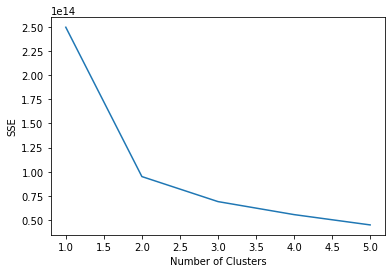

              precision    recall  f1-score   support

           0       0.61      0.17      0.26     40904
           1       0.14      0.20      0.17      9578
           2       0.25      0.26      0.25     16721
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.20     67203
   macro avg       0.20      0.13      0.14     67203
weighted avg       0.45      0.20      0.25     67203



In [ ]:
# Kmeans model:
k_means = cluster.KMeans(n_clusters=3, max_iter=50, random_state=1).fit(X_train)
labels = k_means.labels_

numClusters = [1,2,3,4,5]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(X_train)
    SSE.append(k_means.inertia_)
#Sum of squared distances of samples to their closest cluster center.
#plotting:
plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()


Kmeanspredicted = k_means.predict(X_test)
Kmeanspredicted.reshape(-1,1)

var=classification_report(y_test,Kmeanspredicted)
print(var)

#### Hierarchy Clustering(Decimal Scaling):

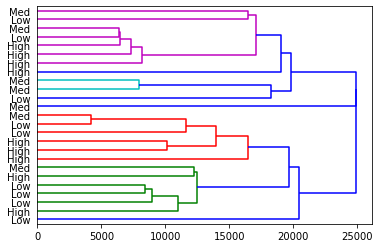

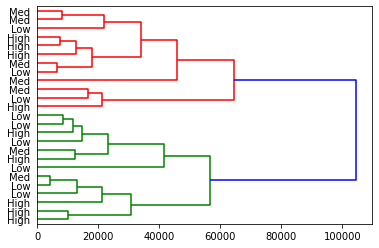

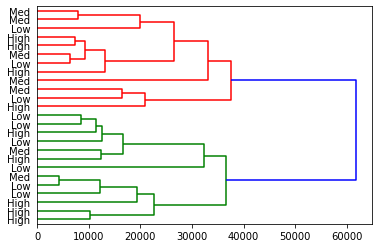

In [ ]:
# Slicing Predictor variable:
X_reduced = X_train[:25]
names = datacopyf3['BookRating']
#Hierarchy Model:
Z = hierarchy.linkage(X_reduced, 'single')
dend = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')
plt.show()
Z = hierarchy.linkage(X_reduced, 'complete')
dend = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')
plt.show()
Z = hierarchy.linkage(X_reduced, 'average')
dend = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')
plt.show()

In [ ]:
print('-X-'*100)
print(' '*50 + "The End" + ''*10)

-X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X--X-
                                                  The End
